In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pygeostat as gs

In [3]:
data = gs.DataFile('jura.dat', x='X', y='Y', z=None)

In [4]:
data.head()

,X,Y,Z,Rock,indicators_rt_1,indicators_rt_2,indicators_rt_3,indicators_rt_4,indicators_rt_5,signed_distances_rt_1,signed_distances_rt_2,signed_distances_rt_3,signed_distances_rt_4,signed_distances_rt_5
0,238.600006,307.700012,0.0,3.0,0.0,0.0,1.0,0.0,0.0,35.424850,34.597420,-34.597420,180.328384,35.403507
1,254.399994,197.199997,0.0,2.0,0.0,1.0,0.0,0.0,0.0,72.366074,-37.030930,37.030930,154.206345,44.782360
2,280.700012,334.700012,0.0,3.0,0.0,0.0,1.0,0.0,0.0,50.014084,35.305805,-29.824139,141.461212,29.824139
3,430.799988,193.300003,0.0,2.0,0.0,1.0,0.0,0.0,0.0,155.206314,-46.104340,79.115410,50.014091,46.104340
4,438.299988,108.099998,0.0,5.0,0.0,0.0,0.0,0.0,1.0,148.618607,26.353182,96.957092,27.829824,-26.353182


In [5]:
cat_dict = {1: 'Argovian',
            2: 'Kimmeridgian',
            3: 'Sequian',
            4: 'Portlandian',
            5: 'Quartenary'}

color_dict = {
            1: '#0000f1',
            2: '#00b1ff',
            3: '#7dff7a',
            4: '#ffc400',
            5: '#f10800'}

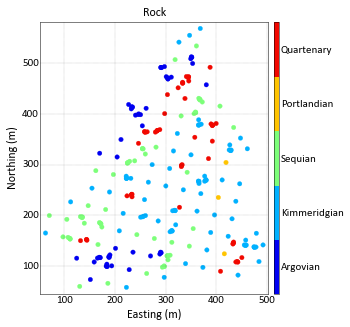

In [6]:
_ = gs.location_plot(data, var='Rock', grid=True, catdict=cat_dict, cmap='jet', output_file='points.png', figsize=(5,5))

In [7]:
data.spacing(n_nearest=3)

In [8]:
data.head()

,X,Y,Z,Rock,indicators_rt_1,indicators_rt_2,indicators_rt_3,indicators_rt_4,indicators_rt_5,signed_distances_rt_1,signed_distances_rt_2,signed_distances_rt_3,signed_distances_rt_4,signed_distances_rt_5,Data Spacing (m)
0,238.600006,307.700012,0.0,3.0,0.0,0.0,1.0,0.0,0.0,35.424850,34.597420,-34.597420,180.328384,35.403507,12.865032
1,254.399994,197.199997,0.0,2.0,0.0,1.0,0.0,0.0,0.0,72.366074,-37.030930,37.030930,154.206345,44.782360,4.047499
2,280.700012,334.700012,0.0,3.0,0.0,0.0,1.0,0.0,0.0,50.014084,35.305805,-29.824139,141.461212,29.824139,25.832941
3,430.799988,193.300003,0.0,2.0,0.0,1.0,0.0,0.0,0.0,155.206314,-46.104340,79.115410,50.014091,46.104340,35.385175
4,438.299988,108.099998,0.0,5.0,0.0,0.0,0.0,0.0,1.0,148.618607,26.353182,96.957092,27.829824,-26.353182,3.203934


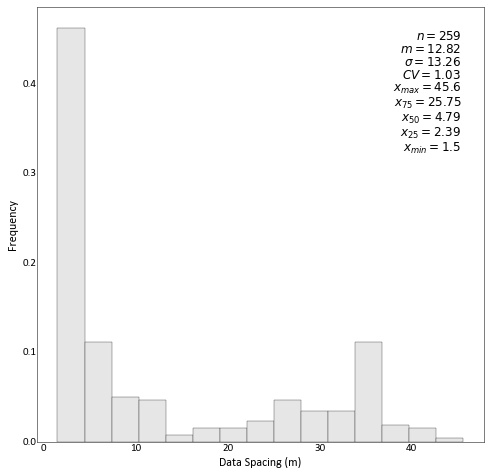

In [9]:
gs.histogram_plot(data, var='Data Spacing (m)')

In [10]:
var_calc = gs.Program('varcalc.exe', getpar=True)

D:\Google Drive\Academia\papers\Assessing geological model uncertainty using signed distances and probability fields - REM\tmpepwzpobs\varcalc.par has been copied to the clipboard


In [11]:
n_lags = 15
lag = 12
lag_tol = lag/2

In [12]:
varcalcpar = parstr = """                  Parameters for VARCALC
                  **********************
 
START OF PARAMETERS:
{flname}                 -file with data
1   2   0                         -   columns for X, Y, Z coordinates
1   {col_num}   {col_num}                         -   number of variables,column numbers (position used for tail,head variables below)
-998.0    1.0e21                  -   trimming limits
1                                 -number of directions
0.0 180 30 0.0 0 0 0.0   -Dir 01: azm,azmtol,bandhorz,dip,diptol,bandvert,tilt
 {n_lags}  {lag}  {lag_tol}                 -        number of lags,lag distance,lag tolerance
{outfl}                       -file for experimental variogram points output.
0                                 -legacy output (0=no, 1=write out gamv2004 format)
1                                 -run checks for common errors
1                                 -standardize sills? (0=no, 1=yes)
1                                 -number of variogram types
1   1   1   ?                     -tail variable, head variable, variogram type (and cutoff/category), sill
"""

for ind in [1,2,3,4,5]:
    parstr = varcalcpar.format(flname=data.flname,
            col_num=data.gscol('indicators_rt_{}'.format(ind)),
            n_lags=n_lags,
            lag=lag,
            lag_tol=lag_tol,
            outfl='out_fl_{}.out'.format(ind))
    
    var_calc.run(parstr=parstr, liveoutput=True)

Calling:  ['varcalc.exe', 'temp']

varcalc version:  1.400

  data file: jura.dat
  x,y,z columns:            1           2           0
  number of variables:            1
  Variable columns:            5
  tmin,tmax:   -998.000000000000       1.000000000000000E+021
  number of directions:            1
  direction parameters:
 azm,azmtol,bandhorz  0.000000000000000E+000   180.000000000000     
   30.0000000000000     
 dip,diptol,bandvert  0.000000000000000E+000  0.000000000000000E+000
  0.000000000000000E+000
 tilt  0.000000000000000E+000
 nlags,lagdist,lagtol          15   12.0000000000000     
   6.00000000000000     
  output file: out_fl_1.out
  legacy output?            0
  run checks?            1
  attempt to standardize sills?            1
  number of variogram types:            1
 Variogram tail,head,type           1           1           1
  will attempt to figure out sill to standardize with
 Reading data file
 Setting up final parameters for variogram calculation
 Calculat

In [13]:
var_model = gs.Program('varmodel.exe', getpar=True)

D:\Google Drive\Academia\papers\Assessing geological model uncertainty using signed distances and probability fields - REM\tmpykiv733t\varmodel.par has been copied to the clipboard


In [14]:
varmodelpar = parstr = """                  Parameters for VARMODEL
                  ***********************
 
START OF PARAMETERS:
{model_out}                 -file for modeled variogram points output
1                            -number of directions to model points along
  0.0   0.0  1000   0.5      -  azm, dip, npoints, point separation
1    0:0.1                   -nst, nugget effect
1    ?    0.0   0.0   0.0    -it,cc,azm,dip,tilt (ang1,ang2,ang3)
        ?     ?     ?    -a_hmax, a_hmin, a_vert (ranges)
1   100000                   -fit model (0=no, 1=yes), maximum iterations
1.0                          -  variogram sill (can be fit, but not recommended in most cases)
1                            -  number of experimental files to use
{exp}                  -    experimental output file 1
2   1   4                    -      # of variograms (<=0 for all), variogram #s
1   1   10                   -  # pairs weighting, inverse distance weighting, min pairs
1     1.0                   -  fix Hmax/Vert anis. (0=no, 1=yes)
1      1.0                   -  fix Hmin/Hmax anis. (0=no, 1=yes)
{model}              -  file to save fit variogram model
"""

for ind in [1,2,3,4,5]:
    parstr = varmodelpar.format(model_out='model_file_out_{}.out'.format(ind), 
                                exp='out_fl_{}.out'.format(ind), 
                                model='var_model_{}.out'.format(ind))
    
    var_model.run(parstr=parstr, liveoutput=True)

Calling:  ['varmodel.exe', 'temp']

varmodel version: 1.1.1

  output points file: model_file_out_1.out
  number of directions to model points along:            1
  azm, dip, npoints, pointsep:   0.000000000000000E+000  0.000000000000000E+000
        1000  0.500000000000000     
  nst =           1
 c0 constrained to  0.000000000000000E+000  0.100000000000000     
  fit model?            1      100000
  number of variogram files:            1
  variogram file: out_fl_1.out
  using variograms            1           4
  # pairs wt, inv dist wt, min pairs:            1           1          10
  fixhmaxvert,hmaxvert:            1   1.00000000000000     
  fixhminhmax,hminhmax:            1   1.00000000000000     
  variogram model output file: var_model_1.out
 Reading experimental variograms for variogram fitting
  Fitting variograms
 Starting objective value =   3.262844507062139E-003
 Final objective value =   3.631305449570981E-004
  Modeling points

varmodel completed successfully

Cal

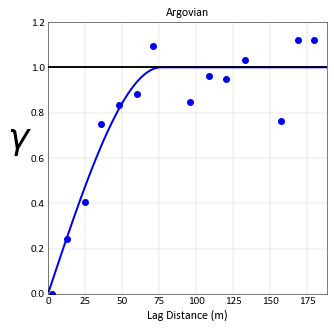

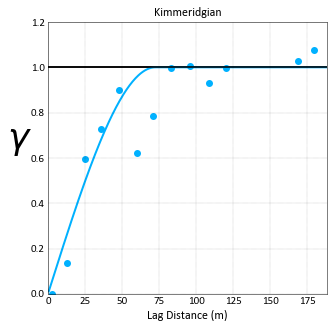

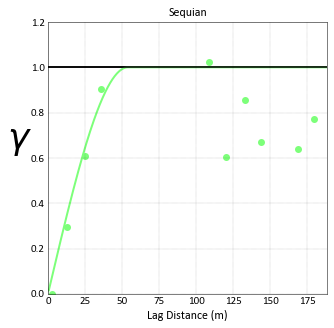

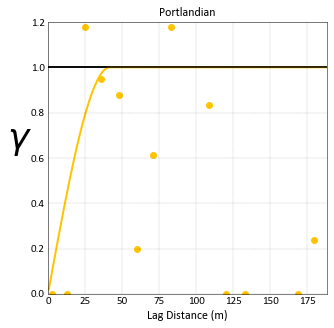

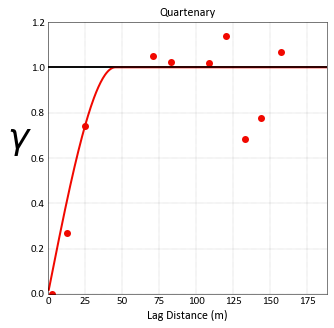

In [15]:
for ind in [1,2,3,4,5]:
    varfl = gs.DataFile('out_fl_{}.out'.format(ind))
    modelfl=gs.DataFile('model_file_out_{}.out'.format(ind))
    _ = gs.variogram_plot(varfl, title=cat_dict[ind], color=color_dict[ind], grid=True, ms=7, figsize=(5,5))
    gs.variogram_plot(modelfl, experimental=False, ax= _, color=color_dict[ind], output_file='var_{}.png'.format(ind), lw=2)

In [16]:
data = gs.DataFile('jurapts', x='X', y='Y', z=None)

In [17]:
data.head()

,X,Y,Z,indicators_rt_1,indicators_rt_2,indicators_rt_3,indicators_rt_4,indicators_rt_5,signed_distances_rt_1,signed_distances_rt_2,signed_distances_rt_3,signed_distances_rt_4,signed_distances_rt_5
0,238.600006,307.700012,0.0,0.0,0.0,1.0,0.0,0.0,35.424850,34.597420,-34.597420,180.328384,35.403507
1,254.399994,197.199997,0.0,0.0,1.0,0.0,0.0,0.0,72.366074,-37.030930,37.030930,154.206345,44.782360
2,280.700012,334.700012,0.0,0.0,0.0,1.0,0.0,0.0,50.014084,35.305805,-29.824139,141.461212,29.824139
3,430.799988,193.300003,0.0,0.0,1.0,0.0,0.0,0.0,155.206314,-46.104340,79.115410,50.014091,46.104340
4,438.299988,108.099998,0.0,0.0,0.0,0.0,0.0,1.0,148.618607,26.353182,96.957092,27.829824,-26.353182


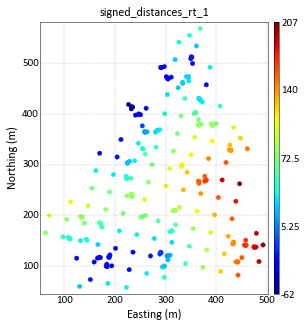

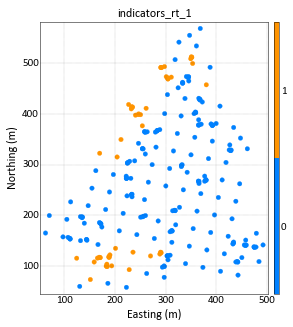

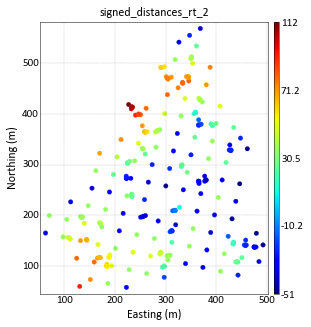

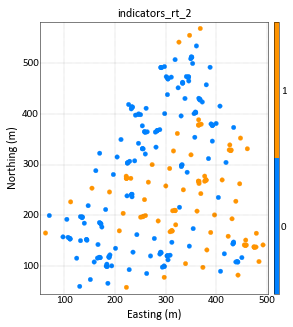

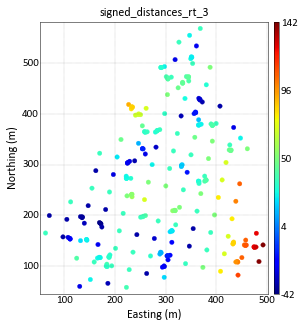

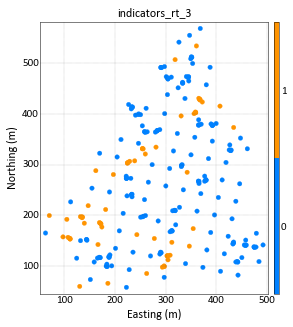

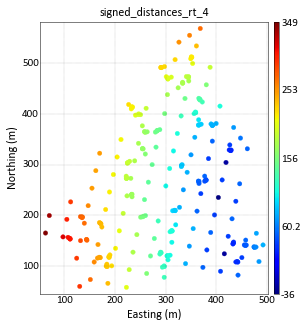

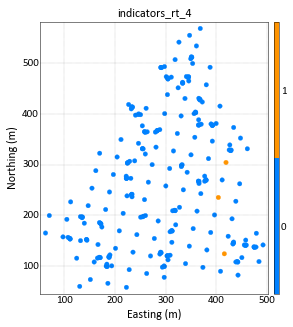

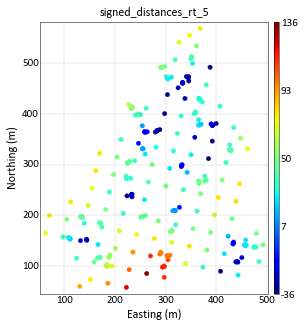

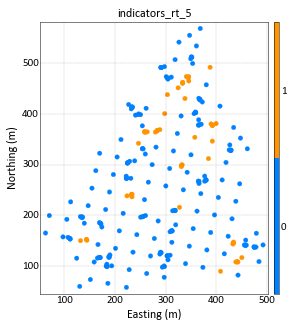

In [18]:
for i in range(1, 6):
    _ = gs.location_plot(data, var='signed_distances_rt_{}'.format(i), grid=True, cmap='jet', output_file='sd{}.png'.format(i), figsize=(5,5))
    _ = gs.location_plot(data, var='indicators_rt_{}'.format(i), grid=True, cmap='jet', output_file='ind{}.png'.format(i), figsize=(5,5))